In [185]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [186]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device : {device}")

Using device : cpu


### Using linear regression formula y  = weight * x + bias 

In [187]:
weight = 0.87
bias = 0.34

start = 0
end = 1
step = 0.02

x = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*x + bias

In [188]:
X_train = x[:int(0.8*(len(x)))]
y_train = y[:int(0.8*(len(x)))]
X_test = x[int(0.8*(len(x))):]
y_test = y[int(0.8*(len(x))):]
len(X_test),len(y_train)

(10, 40)

In [189]:
def plot_predictions(
        train_data = X_train,
        train_labels = y_train,
        test_data = X_test,
        test_labels = y_test,
        predictions=None):
    
    plt.scatter(train_data,train_labels, c="b", s=5, label="Training Data")
    plt.scatter(test_data,test_labels,c="g",s=5,label="Test Data")

    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=5,label="Predictions")

    plt.legend()

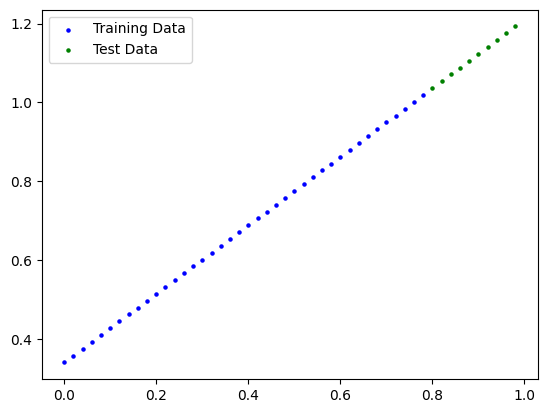

In [190]:
plot_predictions();

In [191]:
# Building a PyTorch linear model by subclassing nn.module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Use nn.linear layer to make model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


In [192]:
torch.manual_seed(42)
model1 = LinearRegressionModel()
model1,model1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [193]:
# Training ( Loss function, Optimizer, Training Loop, Testing loop)
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model1.parameters(),
                            lr=0.001)

In [213]:
torch.manual_seed(42)

epochs = 200

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

    y_preds = model1(X_train)

    loss = loss_fn(y_preds,y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # Testing 
    model1.eval()
    with torch.inference_mode():
        test_pred = model1(X_test)

        test_loss = loss_fn(test_pred,y_test)

        if epoch % 10 == 0:
            print(f"epoch :{epoch } | loss : {loss} | test loss : {test_loss}")

epoch :0 | loss : 0.00039871857734397054 | test loss : 0.0011937618255615234
epoch :10 | loss : 0.00039871857734397054 | test loss : 0.0011937618255615234
epoch :20 | loss : 0.00039871857734397054 | test loss : 0.0011937618255615234
epoch :30 | loss : 0.00039871857734397054 | test loss : 0.0011937618255615234
epoch :40 | loss : 0.00039871857734397054 | test loss : 0.0011937618255615234
epoch :50 | loss : 0.00039871857734397054 | test loss : 0.0011937618255615234
epoch :60 | loss : 0.00039871857734397054 | test loss : 0.0011937618255615234
epoch :70 | loss : 0.00039871857734397054 | test loss : 0.0011937618255615234
epoch :80 | loss : 0.00039871857734397054 | test loss : 0.0011937618255615234
epoch :90 | loss : 0.00039871857734397054 | test loss : 0.0011937618255615234
epoch :100 | loss : 0.00039871857734397054 | test loss : 0.0011937618255615234
epoch :110 | loss : 0.00039871857734397054 | test loss : 0.0011937618255615234
epoch :120 | loss : 0.00039871857734397054 | test loss : 0.0011

In [214]:
model1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8695]])),
             ('linear_layer.bias', tensor([0.3406]))])

In [215]:
weight,bias

(0.87, 0.34)

In [216]:
model1.eval()
with torch.inference_mode():
    y_preds_new = model1(X_test)

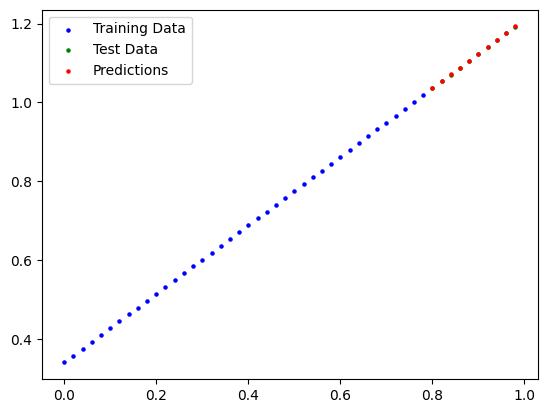

In [217]:
plot_predictions(predictions=y_preds_new)

In [218]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "linear_regression.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models\linear_regression.pth


In [219]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModel()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


In [220]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds_new == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])